In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\HP\Desktop\Ebooks\Work\IT Projects\Data Science\Python\Decision Tree and Random Forest - College ISLR\college.csv')

In [11]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


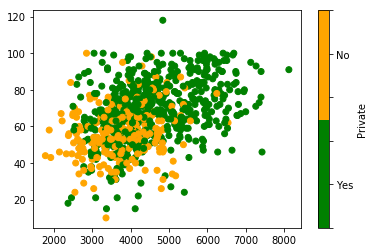

In [4]:
import matplotlib.colors as cl
cMap=cl.ListedColormap(['Green','Orange'])
plt.scatter(df['Room.Board'],df['Grad.Rate'], c=df['Private'].factorize()[0], cmap=cMap)
a=plt.colorbar()
a.set_label('Private', rotation=90)
a.ax.set_yticklabels([' ','Yes',' ',' ','No',' ']);

In [5]:
df[df['Grad.Rate'] > 100] = 100

In [6]:
from sklearn.model_selection import train_test_split
dfs =df.iloc[:,1:]
x=dfs.loc[:,dfs.columns != 'Private']
y=dfs['Private'].factorize()[0]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model = RandomForestClassifier(n_estimators=100)

In [9]:
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
ypred = model.predict(xtest)

In [11]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       144
           1       0.86      0.86      0.86        51

    accuracy                           0.93       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.93      0.93      0.93       195



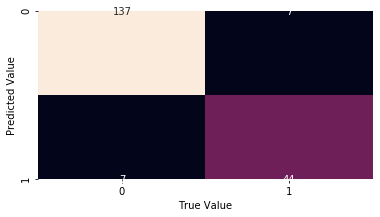

In [12]:
mat=metrics.confusion_matrix(ytest,ypred)
import seaborn as sns
sns.heatmap(mat.T,square=True,annot=True,fmt='d', cbar=False)
plt.xlabel('True Value')
plt.ylabel('Predicted Value');
plt.savefig('outmat.jpeg')

In [22]:
a=pd.DataFrame(ypred)
a=a

In [16]:
x.c

1    0
0    0
1    1
0    0
1    1
    ..
0    0
1    1
0    0
1    1
1    1
Length: 195, dtype: int64